# Ασκήσεις εξάσκησης - Αριθμητική Python και Οπτικοποίηση δεδομένων

## 1. Αριθμητική ολοκλήρωση


Θέλουμε να υπολογίσουμε **αριθμητικά** τα παρακάτω ολοκληρώματα:

- $\displaystyle \int_{0}^{\pi} \sin(x)dx = 2$



- $\displaystyle \int_{-1}^{2} x^3 dx = \frac{15}{4}$



Θα πραγματοποιήσουμε την εκτίμησή μας με τον ευκολότερο δυνατό τρόπο, με τα αθροίσματα κατά Riemann: 

Έστω $f(x)$ μία συνεχής συνάρτηση στο διάστημα $I = [a, b]$. Έστω $x_i$ με $a < x_0 < \dots < x_n < b$ ένα τμήμα του διαστήματος $I$. Αν $\Delta x_i = x_{i+1} - x_i$  με $i \in [0, n-1] $ και $f_{\Delta_i} = f\left(\displaystyle \frac{x_{i} + x_{i+1}}{2} \right)$, το ολοκλήρωμα μπορεί να προσεγγιστεί ως:


$$\displaystyle \int_{a}^{b} f(x) dx \approx \sum_{i=0}^{n-1} \Delta x_i \cdot f_{\Delta_i} = I_{\rm approx}(n)$$


Δείτε τα παρακάτω διαγράμματα ώστε να οπτικοποιήσετε τα αποτελέσματα της μεθόδου. Μπορείτε να διαβάσετε περισσότερα για τα αθροίσματα Riemann στη [Wikipedia](https://en.wikipedia.org/wiki/Riemann_sum).

<div>
    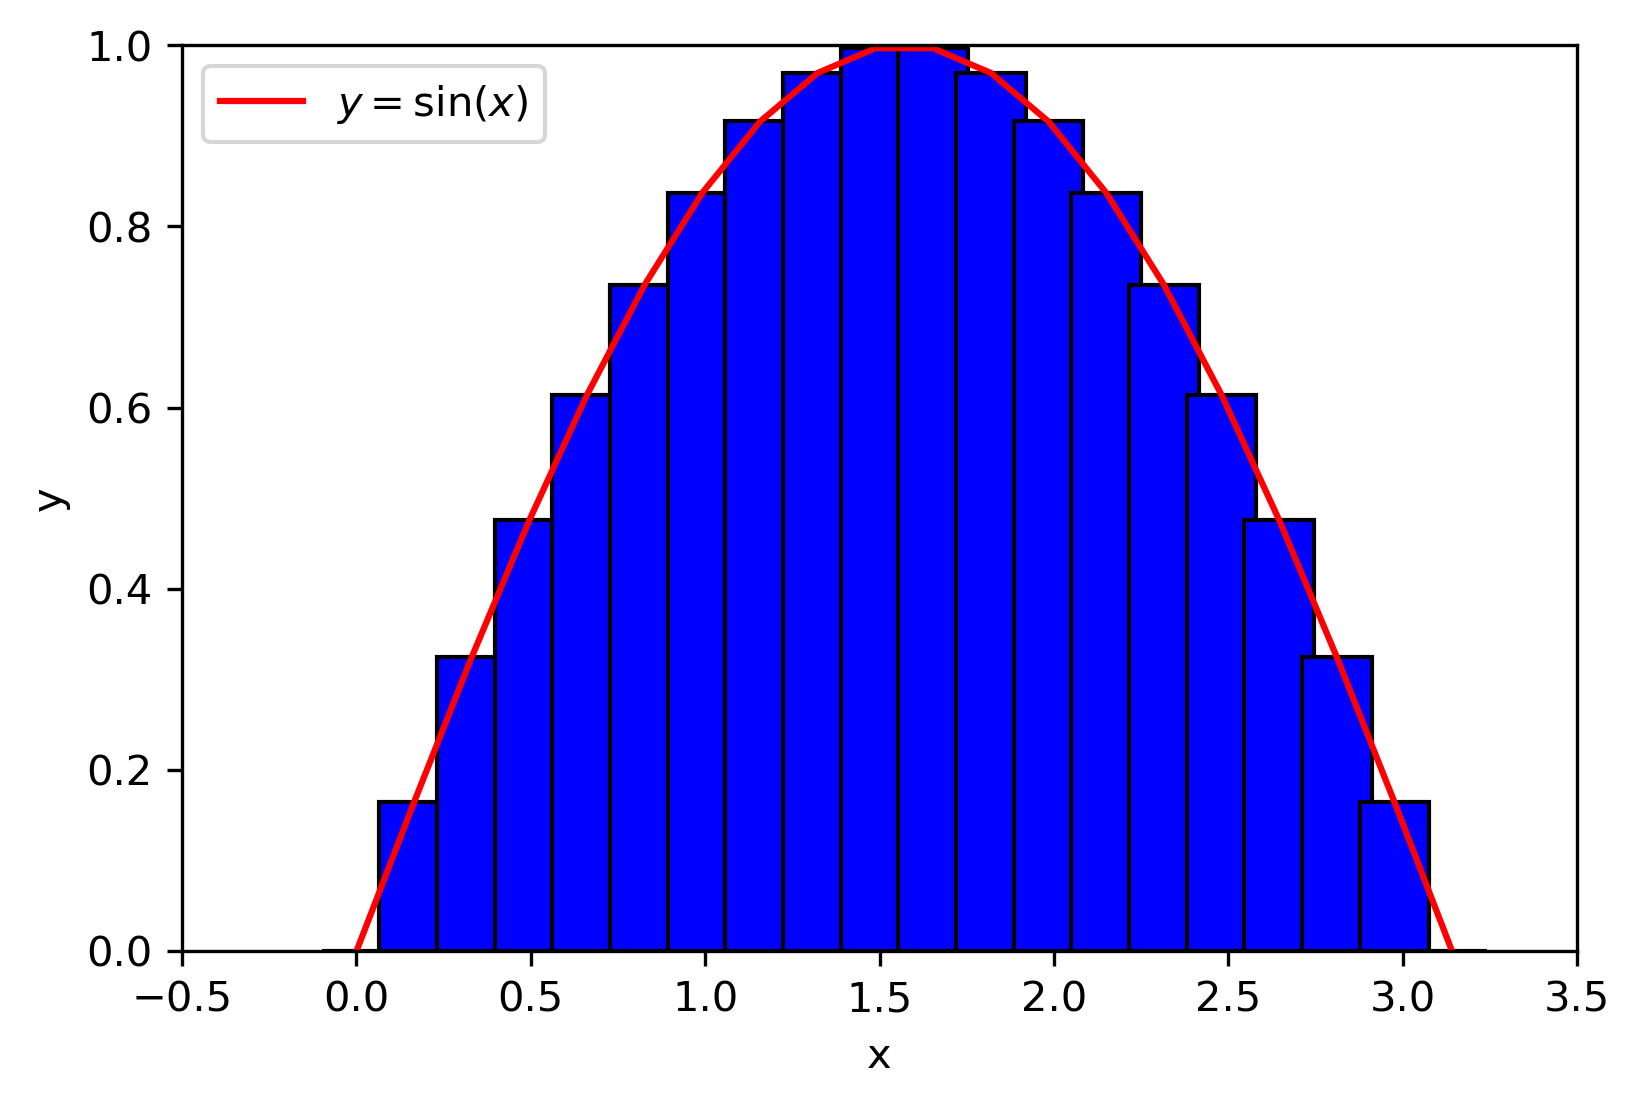
</div>

<div>
    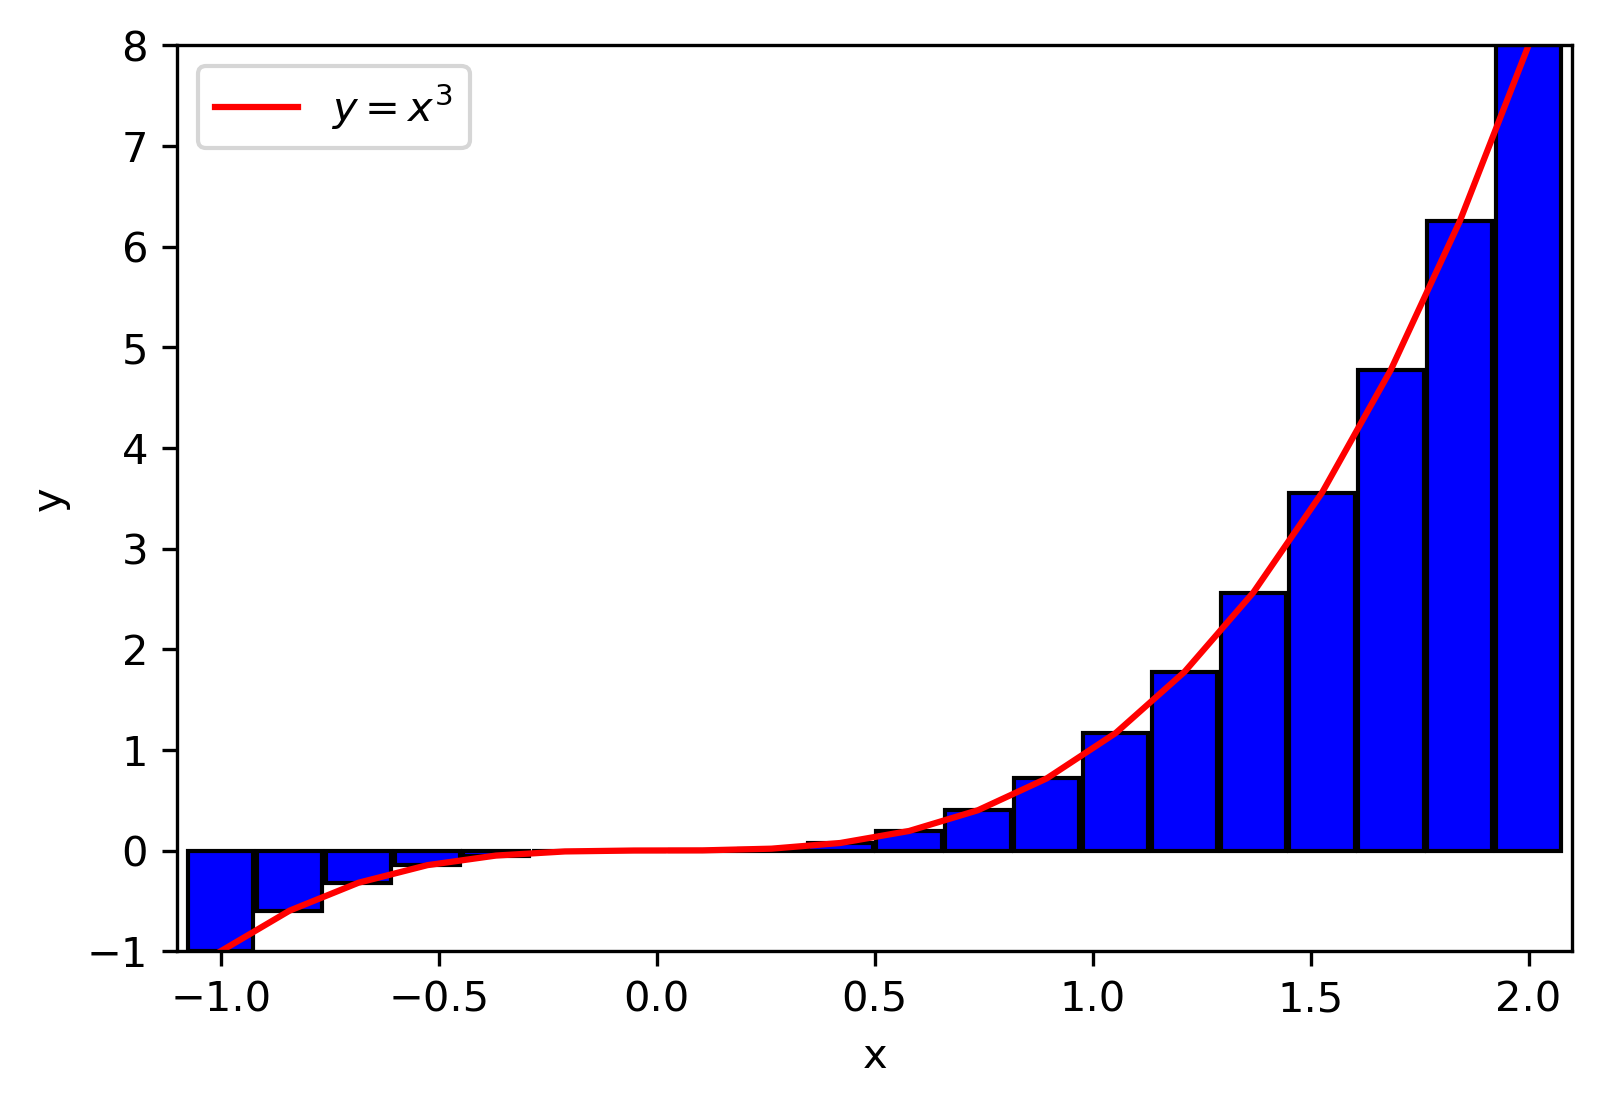
</div>

### 1.1 Εφαρμογή της ολοκλήρωσης κατά Riemann

Κατασκευάστε numpy arrays με τα $x_i$ και τις αντίστοιχες τιμές της συνάρτησης. Βάσει αυτών υπολογίστε τα $\Delta x_i$ και $f_{\Delta_i}$ καθώς και το άθροισμα Riemann.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def riemann_integral(x, function):
    '''
        ARGS
        =======
            - x : array-like; data to feed the function (see below).
            - function : the function to be integrated.
    
        RETURNS
        =======
            - The Riemann sum 
    '''
    
    # a list to keep the elements of 
    # riemann integration
    approx_res = []
    
    for i in range(0, len(x)-1):
    
        delta_x = x[i+1] - x[i]

        fn_arg = (x[i] + x[i+1]) / 2.

        approx_res.append(delta_x * function(fn_arg))

    return sum(approx_res)

In [3]:
n = 20
x1 = np.linspace(-1, 2, n)
x2 = np.linspace(0, np.pi, n)

y1 = riemann_integral(x1, function=lambda x: x**3)
y2 = riemann_integral(x2, function=lambda x: np.sin(x))

print('Riemann sum: {}, epsilon value: {}'.format(y1, np.abs(y1 - (15./4.))))
print('Riemann sum: {}, epsilon value: {}'.format(y2, np.abs(y2 - 2.0)))

Riemann sum: 3.740650969529086, epsilon value: 0.009349030470914066
Riemann sum: 2.0022801200729097, epsilon value: 0.002280120072909675


### 1.2 Ακρίβεια της εκτίμησης

Προφανώς, η ακρίβεια των αριθμητικών εκτιμήσεων εξαρτάται από τη διάτμηση του διαστήματος $I = [a,b]$ και ιδιαίτερα από την επιλογή του $n$. Μπορεί κανείς να δείξει ότι το απόλυτο λάθος, $\epsilon_{\rm abs}(n)$, της προσέγγισης του ολοκληρώματος με τα αθροίσματα Riemann έχει τη συμπεριφορά:

$$\epsilon_{\rm abs}(n) = \left| I_{\rm approx}(n) - \displaystyle \int_{a}^{b} f(x)dx \right| \propto n^\kappa$$


Πραγματοποιήστε πειράματα για να εκτιμήσετε την τιμή του $\kappa$. 

**ΠΡΟΣΟΧΗ:** Το ερώτημα είναι επίτηδες διατυπωμένο με αόριστο τρόπο. Το να σκεφτείτε κάποιο λογικό τρόπο εξέτασης των αποτελεσμάτων είναι μέρος της άσκησης.

In [4]:
# Vectorize the function in order to work with arrays
# You can try to modify the function so that it "knows"
# about numpy arrays, making this vectorization step obsolete
vectorized_riemann_integral = np.vectorize(riemann_integral)

# The upper limit for each x-interval
n_range = np.asarray(range(50, 10_001, 50))

# The x-intervals
x1_values = np.asarray([np.linspace(-1, 2, i) for i in n_range])
x2_values = np.asarray([np.linspace(0., np.pi, i) for i in n_range])

# The calculated y-values (Riemann sum) for each x-interval 
y1 = vectorized_riemann_integral(x1_values, function=lambda x: x**3)
y2 = vectorized_riemann_integral(x2_values, function=lambda x: np.sin(x))

# The true y-values
y1_true = np.ones_like(y1) * (15./4.)
y2_true = np.ones_like(y2) * 2.0

# The epsilon error
eps1 = np.abs(y1 - y1_true)
eps2 = np.abs(y2 - y2_true)

# The kappa exponent in: eps \approx n^{\alpha}
exp1 = np.log10(eps1) / np.log10(n_range)
exp2 = np.log10(eps2) / np.log10(n_range)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


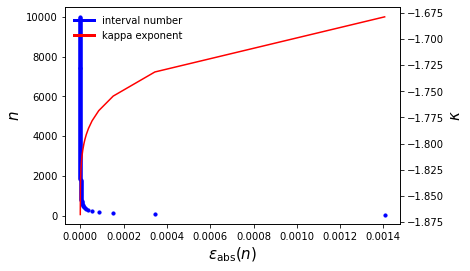

In [5]:
from matplotlib.pyplot import Line2D


# Since we are working with 2 different axes
# we will create a custom legend to describe both 
legend_elements = [Line2D([0], [0], color='b', lw=3, label='interval number'),
                  Line2D([0], [0], color='r', lw=3, label='kappa exponent')
                 ]                 

# This is an object-oriented approach for plotting 
# with matplotlib
fig, ax1 = plt.subplots()

# Duplicate y-axis (x-axis is the same)
ax2 = ax1.twinx()

# Set x/y labels for all axes
ax1.set_xlabel(r'$\epsilon_{\rm abs} (n)$', size=15)
ax1.set_ylabel(r'$n$', size=15)
ax2.set_ylabel(r'$\kappa$', size=15)

_ = ax1.scatter(eps1, n_range, c='b', s=10)
_ = ax2.plot(eps1, exp1, c='r')

_ = plt.legend(handles=legend_elements, loc='best', frameon=False)

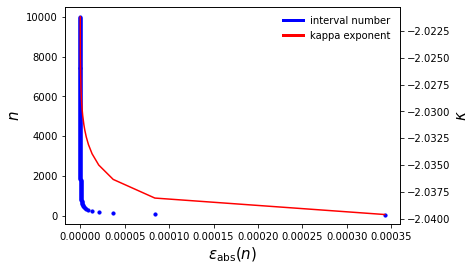

In [6]:
legend_elements = [Line2D([0], [0], color='b', lw=3, label='interval number'),
                  Line2D([0], [0], color='r', lw=3, label='kappa exponent')
                 ]                 

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.set_xlabel(r'$\epsilon_{\rm abs} (n)$', size=15)
ax1.set_ylabel(r'$n$', size=15)
ax2.set_ylabel(r'$\kappa$', size=15)

_ = ax1.scatter(eps2, n_range, c='b', s=10)
_ = ax2.plot(eps2, exp2, c='r')

_ = plt.legend(handles=legend_elements, loc='best', frameon=False)

In [7]:
# Find the mean value for the exponent

print(exp1[np.where(eps1 < 1e-6)].mean(), np.mean(exp1))
print(exp2[np.where(eps2 < 1e-6)].mean(), np.mean(exp2))

-1.8579578848061002 -1.8493255232609644
-2.0231764358120246 -2.023974673633935


## 2. Διάδοση σφαλμάτων με Monte-Carlo

Στις έως τώρα σπουδές σας έχετε έρθει αντιμέτωποι, το πιο πιθανό σε κάποιο εργαστήριο, με την έννοια της διάδοσης σφαλμάτων (δείτε [εδώ](https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas) για τους κανόνες). Η βασική ιδέα είναι ότι όταν μας δίνονται μετρήσεις κάποιων ποσοτήτων που περιέχουν κάποια αβεβαιότητα, μπορούμε να βρούμε την αβεβαιότητα στην μέτρηση μιας άλλης ποσότητας που σχετίζεται με τις αρχικές μας ποσότητες με κάποιο συγκεκριμένο τρόπο.

Για παράδειγμα, ας πάρουμε την γνωστή μας εξίσωση: 

$$F = G\frac{m_1 m_2}{r^2}$$ 

όπου μας δίνει την βαρυτική δύναμη μεταξύ δύο μαζών $m_1$ και $m_2$ που βρίσκονται σε απόσταση $r$ μεταξύ τους.

Ας υποθέσουμε τώρα ότι έχουμε δύο αντικείμενα με μάζες: 

$$M_1 = 40 \times 10^4 \pm 0.05\times 10^4\;\text{kg}$$ 

και 

$$M_2 = 30 \times 10^4 \pm 0.1\times 10^4\;\text{kg}$$ 

τα οποία απέχουν μεταξύ τους απόσταση 

$$R = 3.2 \pm 0.011\;\text{m}$$

όπου οι αβεβαιότητες είναι η τυπική απόκλιση (standard deviation) Γκαουσιανών κατανομών που θα μπορούσαν να οφείλονται σε σφάλματα μετρήσεων.

Επίσης, θεωρείστε ότι η σταθερά της παγκόσμιας έλξης είναι γνωστή και η τιμή της δεν συνοδεύεται από κάποια αβεβαιότητα:

$$G = 6.67384 \times 10^{-11}\,\text{m$^3$ kg$^{-1}$ s$^{-2}$}$$


Χρησιμοποιήστε τους [κανόνες διάδοσης σφαλμάτων](https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas) και **γράψτε κώδικα** ώστε να υπολογίσετε την βαρυτική δύναμη και την αβεβαιότητα της τιμής της.

Στη συνέχεια θα επιχειρήσουμε να κάνουμε τον ίδιο υπολογισμό αλλά χρησιμοποιώντας την **τεχνική Monte-Carlo**. Η ιδέα πίσω από αυτή την τεχνική είναι να παράγουμε πολλές πιθανές λύσεις χρησιμοποιώντας τυχαίους αριθμούς και βάσει αυτών να δούμε το πως κατανέμεται η ποσότητα που μας ενδιαφέρει. Προφανώς, οι τυχαίοι αριθμοί που μπορεί να πάρει μία ποσότητα περιορίζονται από το τι αντιπροσωπεύει (π.χ. αν θέλουμε να επιλέξουμε τυχαίες τιμές για τον χρόνο, δεν μπορούμε να επιλέξουμε τυχαία από ένα εύρος που περιέχει αρνητικές τιμές).

Για τη συγκεκριμένη άσκηση, μπορείτε να χρησιμοποιήσετε την τεχνική Monte-Carlo για την διάδοση σφαλμάτων ως εξής:

- κάντε μία τυχαία δειγματοληψία τιμών για τα $M_1$, $M_2$ και $R$, 1,000,000 φορές, χρησιμοποιώντας τις μέσες τιμές και τις αντίστοιχες τυπικές αποκλίσεις που δίνονται παραπάνω. **Υπόδειξη:** Μπορείτε να πάρετε τυχαίους αριθμούς οι οποίοι ακολουθούν την κανονική (Γκαουσιανή) κατανομή με τη μέθοδο ``normal`` της βιβλιοθήκης ``numpy.random``.



- Υπολογίστε την βαρυτική δύναμη για κάθε συνδυασμό των τυχαίων τιμών $M_1$, $M_2$, $R$.

Υλοποιήστε τα παραπάνω βήματα χρησιμοποιώντας ``numpy arrays`` και **χωρίς καθόλου βρόγχους**. Θα πρέπει να πάρετε, με αυτόν τον τρόπο, ένα array με 1,000,000 διαφορετικές τιμές για τη βαρυτική δύναμη (μία για κάθε συνδυασμό των τριών ποσοτήτων που κάνετε δειγματοληψία).

Φτιάξτε το **κανονικοποιημένο ιστόγραμμα** (normalized histogram) για αυτές τις τιμές της δύναμης. Στο ίδιο γράφημα βάλτε μία Γκαουσιανή συνάρτηση όπου η μέση τιμή και η τυπική απόκλιση προκύπτουν από τους κανόνες διάδοσης σφάλματος. Σιγουρευτείτε ότι επιλέγετε ένα κατάλληλο εύρος για τις τιμές στον $x$-άξονα, ώστε να φαίνονται ικανοποιητικά και οι δύο κατανομές. Επίσης, σιγουρευτείτε ότι χρησιμοποιείτε έναν εύλογο αριθμό διαστημάτων (bins) για το ιστόγραμμα ώστε να μπορείτε να συγκρίνετε το σχήμα του ιστογράμματος με αυτό της συνάρτησης Gauss. Θα πρέπει να συμφωνούν αρκετά καλά. 

Το τελικό γράφημα θα πρέπει να μοιάζει κάπως έτσι:

<div>
    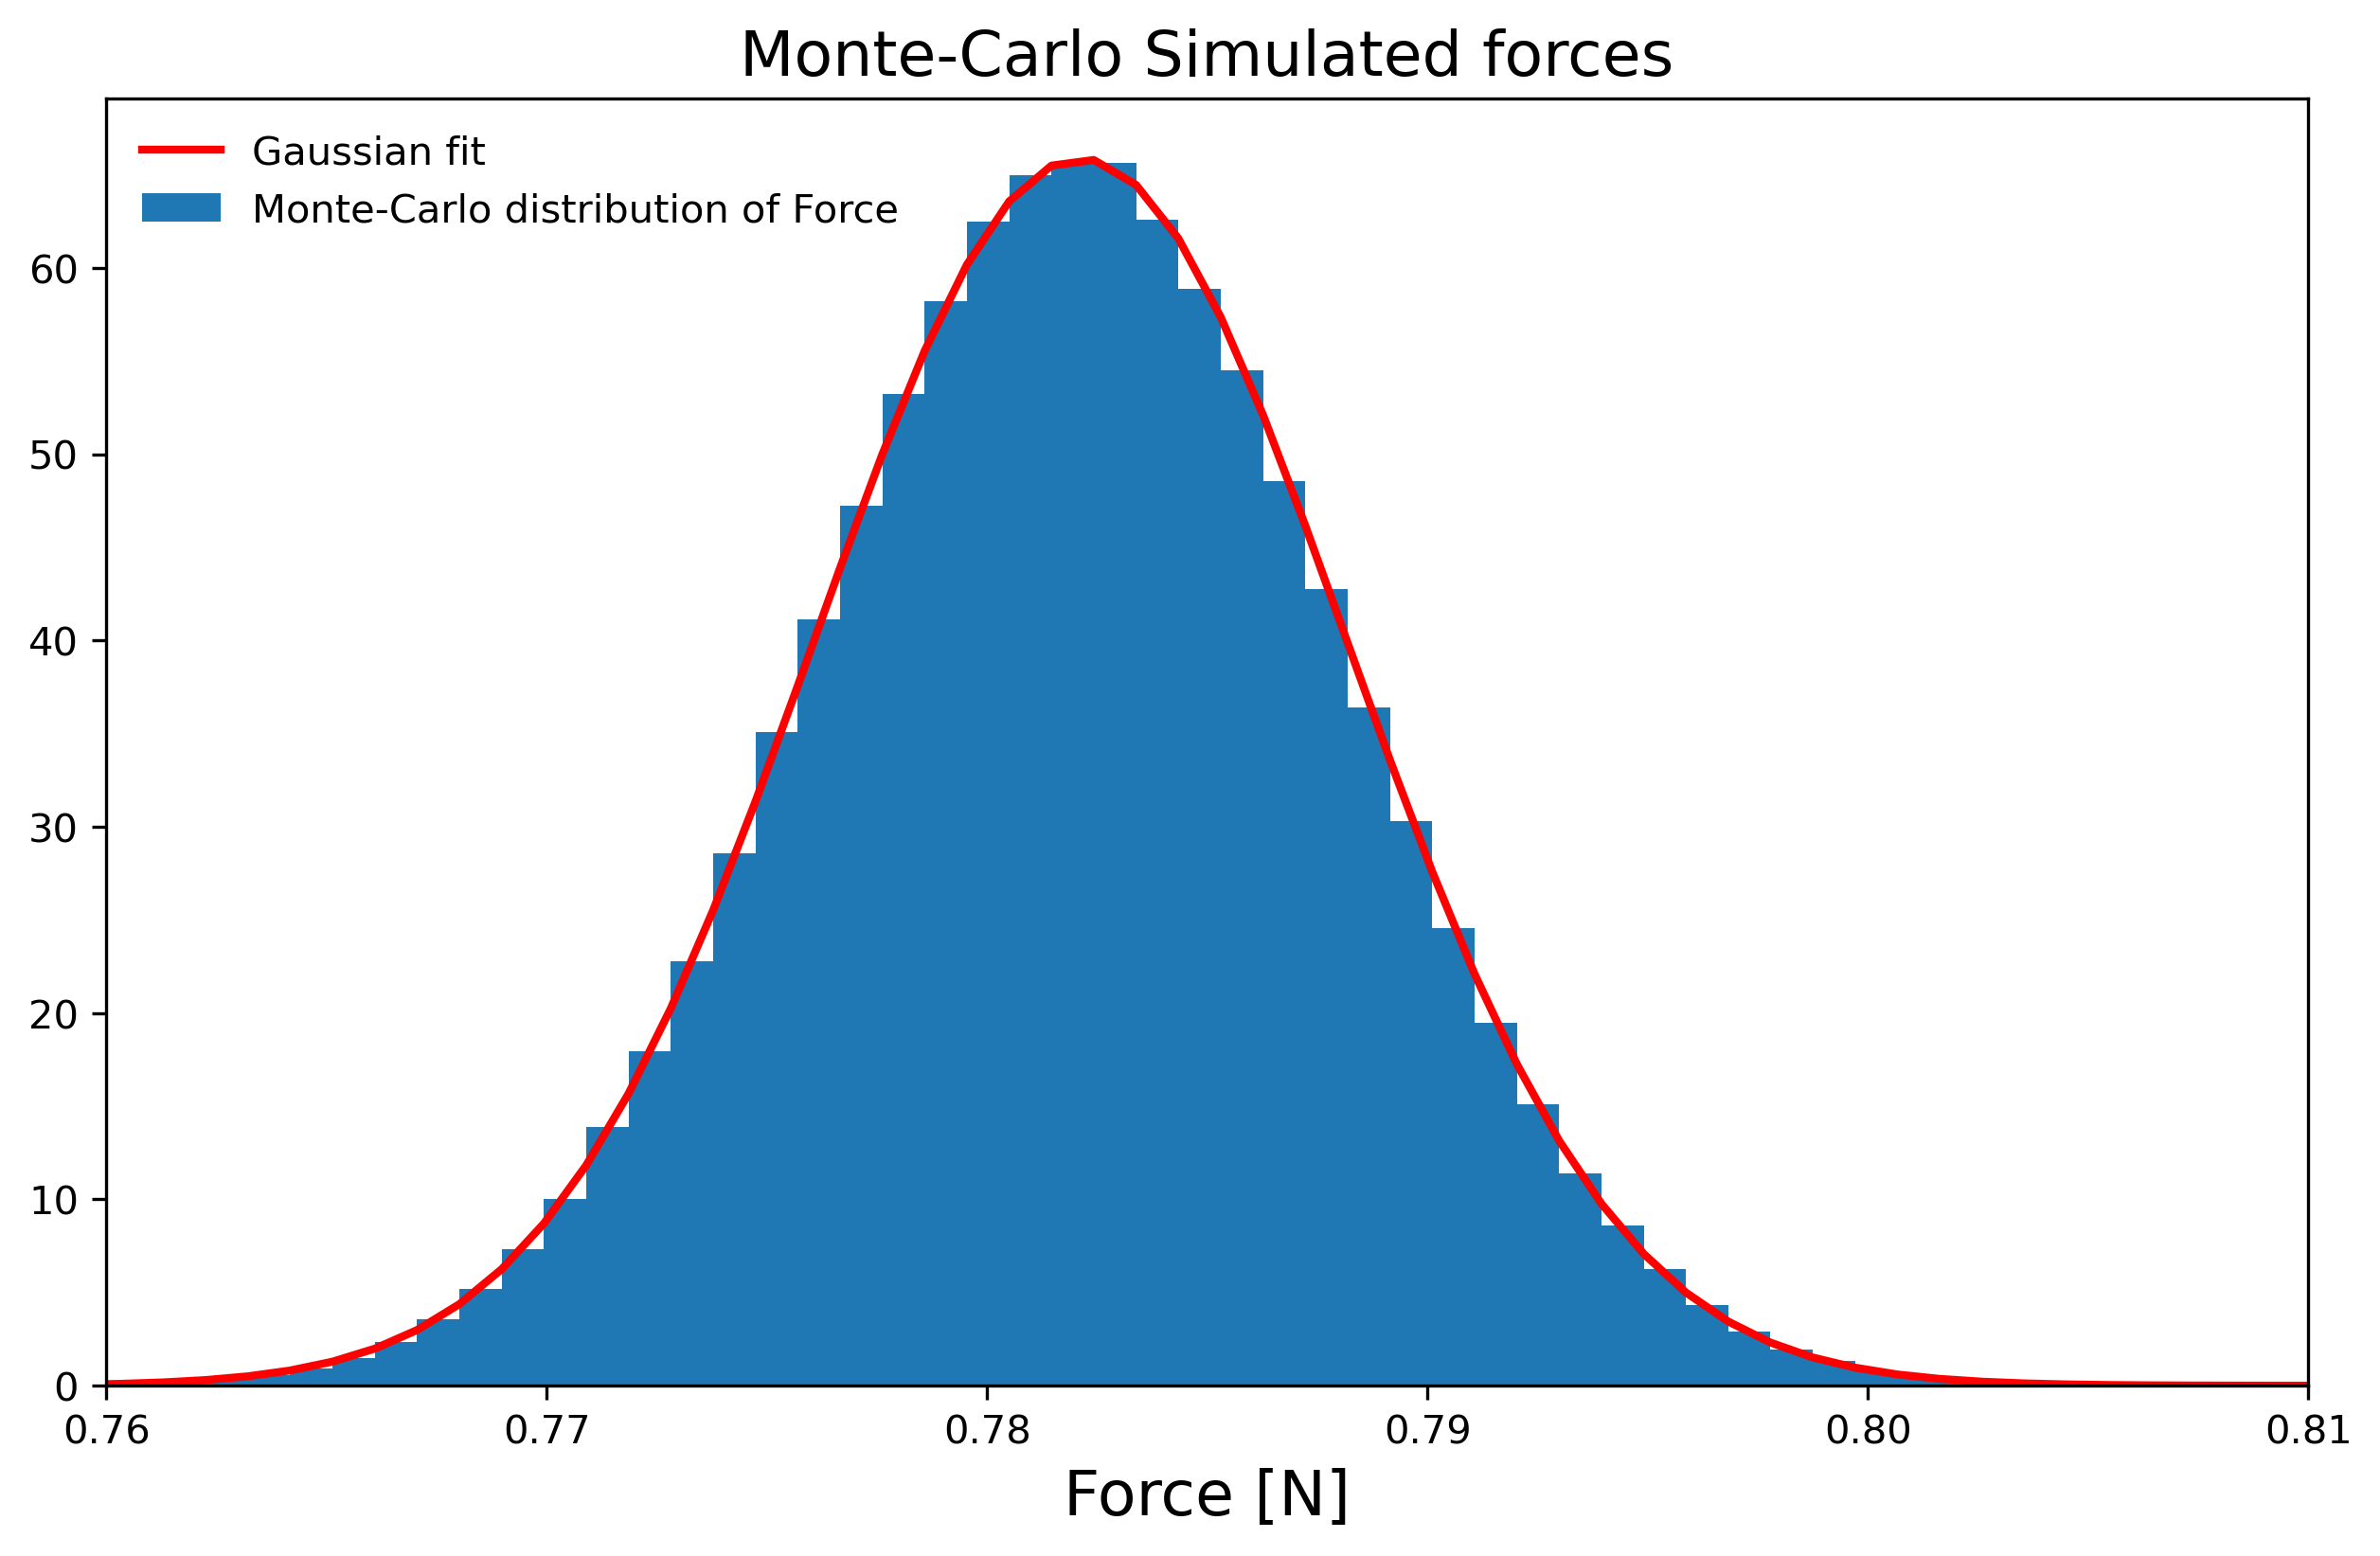
</div>


Δοκιμάστε να επαναλάβετε την διαδικασία αλλάζοντας μόνο τον αριθμό των επαναλήψεων ξεκινώντας από $n=10$ και ανεβαίνοντας μία τάξη μεγέθους κάθε φορά μέχρι το $n=100,000$. Τι παρατηρείτε; Μπορείτε να εξηγήσετε κάποια πλεονεκτήματα που μας δίνει η τεχνική Monte-Carlo;

In [8]:
def gravitational_force(m1, m2, r, G=6.67384e-11):
    return (G * m1 * m2) / (r**2)

# Define masses, distance, and one-sigma deviations from the corresponding measurements
M1, sigma_M1 = 4.0e5, 0.05e4
M2, sigma_M2 = 3.0e5, 0.1e4
R, sigma_R = 3.2, 0.011

# Caclulation of the one sigma deviation of the distance squared using error propagation
# sigma_R_squared = (R**2) * np.sqrt(2 * (sigma_R/R)**2)
sigma_R_squared = 2 * R * sigma_R

# Calculation of the gravitational force
F = gravitational_force(M1, M2, R)


# Calculation of the one sigma deviation of gravitational force based on the error
# propagation rules
sigma_F = F * np.sqrt((sigma_M1 / M1)**2 + (sigma_M2 / M2)**2 + (sigma_R_squared / R**2)**2)


print("The force is {} N with an error of {}".format(round(F, 5), 
                                                     round(sigma_F, 5)
                                                    )
     )

The force is 0.78209 N with an error of 0.00605


The force is 0.78212 N with an error of 0.00606


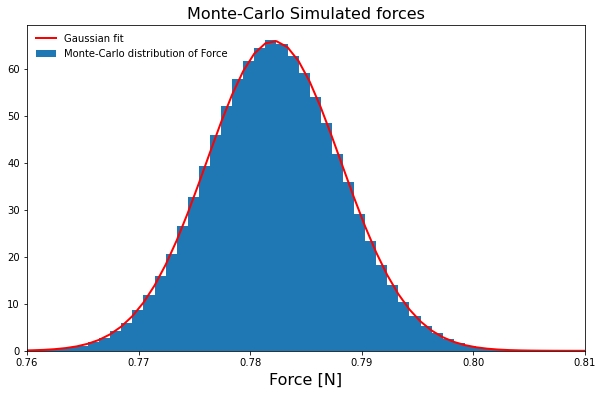

In [9]:
def gauss_distribution(x, mu, sigma):
    """         
        ARGS:
        =======
            - The value at which to evaluate the Gauss
            - Tne mean mu of the distribution
            - The width sigma of the distribution
          
        RETURNS:
        ========
            - The calculated gauss function value
    """
    factor = (1.0 / np.sqrt(2.0 * sigma**2 * np.pi))
    expon = np.exp(-(x - mu)**2 / (2.0 * sigma**2))
    
    return factor * expon


n = 1_000_000

# Not really needed for this example
# but in many cases(e.g. when conditionals exist) 
# vectorization of functions is important
gravitational_force_vectorized = np.vectorize(gravitational_force)



# Create samples for the 2 masses and the distance
M1_distribution = np.random.normal(M1, sigma_M1, n)
M2_distribution = np.random.normal(M2, sigma_M2, n)
R_distribution = np.random.normal(R, sigma_R, n)

# Calculate the distribution of error for the R^2 quantity
sigma_R_squared_distribution = 2 * R_distribution * sigma_R

# Calculate the force for each set of values.
F_distribution = gravitational_force_vectorized(M1_distribution, M2_distribution, R_distribution)


# Find the mean, sigma of the force
sigma_F_distribution = F_distribution * np.sqrt((sigma_M1 / M1_distribution)**2 + (sigma_M2 / M2_distribution)**2 + \
                             (sigma_R_squared_distribution / (R_distribution ** 2))**2)




print("The force is {} N with an error of {}".format(round(F_distribution.mean(), 5), 
                                                     round(sigma_F_distribution.mean(), 5)
                                                    )
     )

# # Plot the histogram
plt.figure(figsize=(10,6))
plt.title("Monte-Carlo Simulated forces", size=16)
plt.xlabel("Force [N]", size=16)
plt.xlim([0.76, 0.81])


count, bins, ignored = plt.hist(F_distribution, 60, density=True, label="Monte-Carlo distribution of Force")

# # Plot the Gaussian fit
_ = plt.plot(bins, gauss_distribution(bins, F_distribution.mean(), sigma_F_distribution.mean()), 
         linewidth=2, 
         color='r', 
         label="Gaussian fit")


_ = plt.legend(loc="upper left", frameon=False)
# plt.savefig('mc_error_propagation.png', dpi=300, bbox_inches='tight')

Η τεχνική Monte-Carlo προσφέρει μία γραφική αναπαράσταση των διαφορετικών αποτελεσμάτων καθώς και τις πιθανότητες αυτών να πραγματοποιηθούν. Με άλλο λόγια, τα αποτελέσματα μιας προσομοίωσης Monte-Carlo μας δείχνουν όχι μόνο το τι θα μπορούσε να συμβεί, αλλά και το πόσο πιθανό είναι να συμβεί κάθε ένα από αυτά τα διαφορετικά αποτελέσματα.

Επίσης, με την τεχνική MC μπορούμε να έχουμε μία εικόνα του ποιές μεταβλητές επηρεάζουν το τελικό αποτέλεσμα και με ποιόν τρόπο.

## 3. Ραβδογράμματα (bar plots)

Προσπαθείστε να αναπαράγετε (όσο μπορείτε πιο πιστά) τα διαγράμματα των αθροισμάτων Riemann που φαίνονται στο πρώτο μέρος των ασκήσεων. Χρησιμοποιείστε τις βιβλιοθήκες ``numpy`` και ``matplotlib``.

**Hint:** Αναζητείστε στο διαδίκτυο τη τεκμηρίωση της συνάρτησης ``matplotlib.pyplot.bar``.

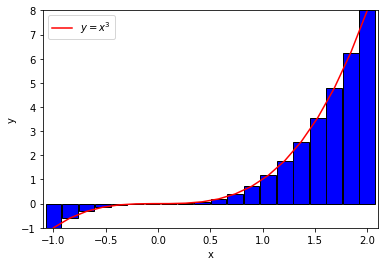

In [10]:
# For n = 20
plt.xlabel('x')
plt.ylabel('y')

plt.ylim([-1.0, 8.0])
plt.xlim(-1.1, 2.1)

_ = plt.bar(x1, x1**3, width=0.15, color='b', edgecolor='k', linewidth=1.0)
_ = plt.plot(x1, x1**3, color='r', label = r'$y = x^3$')

_ = plt.legend(loc='upper left')
# plt.savefig('poly.png', dpi=300, bbox_inches='tight')

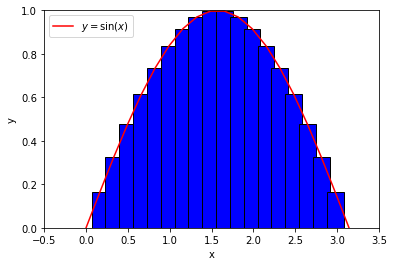

In [11]:
# For n = 20
plt.xlabel('x')
plt.ylabel('y')

plt.ylim([0.0, 1.0])
plt.xlim(-0.5, 3.5)

_ = plt.bar(x2, np.sin(x2), width=0.2, color='b', edgecolor='k', linewidth=1.0)
_ = plt.plot(x2, np.sin(x2), color='r', label = r'$y = \sin(x)$')

_ = plt.legend(loc='upper left')
# plt.savefig('sin.png', dpi=300, bbox_inches='tight')